# State-space Lecture Note Calculations

In [13]:
import numpy as np
import scipy.signal as sig
import scipy.linalg as la
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#### Picture of the problem

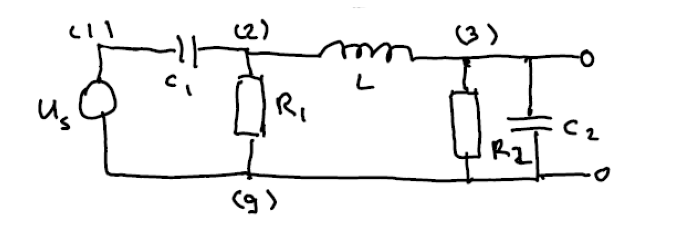

In [14]:
image = mpimg.imread("fig/StateSpaceLectureModel.png")
plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.axis('off')
plt.show()

Set parameters used in the model:

In [15]:
R1 = 1.0
R2 = 2.0
C1 = 3.0
C2 = 7.0
L1 = 5.0

#### Define the system

The State-space representation:
$$
A = \left(
\begin{matrix}
-\frac{1}{R1 C1} & \frac{1}{C1} & 0 \\
-\frac{1}{L1} & 0 & -\frac{1}{L1} \\
0 & \frac{1}{C2} & -\frac{1}{R2 C2} \\
\end{matrix}
\right),
\; 
B = \left( 
\begin{matrix}
\frac{1}{R1 C1} \\ \frac{1}{L1} \\ 0 \\
\end{matrix}
\right),
\; C = \left(
\begin{matrix}
-1 & 0 & 0 \\ 0 & 0 & 1 \\
\end{matrix}
\right),
\; 
D = \left(
\begin{matrix}
1 \\ 0
\end{matrix}
\right)
$$


Put the matrices in python

In [16]:
aa = np.array([[-1/(R1*C1),1/C1,0],[-1/L1,0,-1/L1],[0,1/C2,-1/(R2*C2)]])
bb = np.array([[1/(R1*C1)],[1/L1],[0]])
cc = np.array([[-1,0,0],[0,0,1]])
dd = np.array([[1],[0]])

#### Define the State-space system in python

In [17]:
sysss = sig.StateSpace(aa, bb, cc, dd)
print("System in State-Space is: ",sysss)
systf=sysss.to_tf()
print("System in transfer function is: ",systf)

System in State-Space is:  StateSpaceContinuous(
array([[-0.33333333,  0.33333333,  0.        ],
       [-0.2       ,  0.        , -0.2       ],
       [ 0.        ,  0.14285714, -0.07142857]]),
array([[0.33333333],
       [0.2       ],
       [0.        ]]),
array([[-1,  0,  0],
       [ 0,  0,  1]]),
array([[1],
       [0]]),
dt: None
)
System in transfer function is:  TransferFunctionContinuous(
array([[ 1.00000000e+00,  7.14285714e-02,  2.85714286e-02,
         0.00000000e+00],
       [ 0.00000000e+00,  1.11022302e-16,  2.85714286e-02,
        -5.20417043e-18]]),
array([1.        , 0.4047619 , 0.11904762, 0.01428571]),
dt: None
)


#### Calculate the eigenvalues of matrix A

In [18]:
aval = la.eigvals(aa)
print('The eigenvalues of the A-matrix are: ', aval)

The eigenvalues of the A-matrix are:  [-0.11139634+0.25709349j -0.11139634-0.25709349j -0.18196923+0.j        ]


#### Calculate the Step-response and plot the results

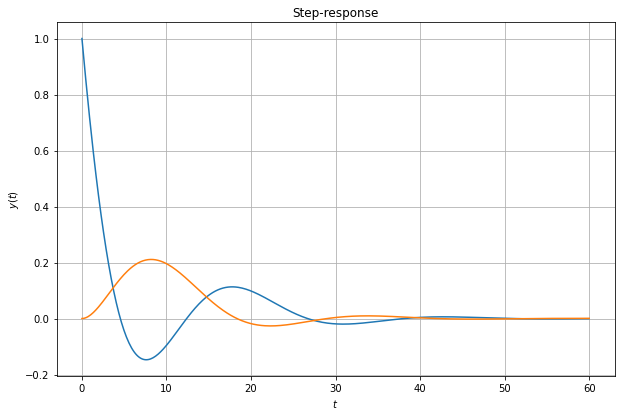

In [19]:
t = np.linspace(0, 60, num=400)
u = np.ones_like(t)
tout, y, x = sig.lsim(systf, u, t)
plt.figure(figsize=(10,6.5))
plt.plot(t, y,label='step-response')
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.title('Step-response')
plt.grid(True)
plt.show()

#### Repeat the procedure for the impulse response

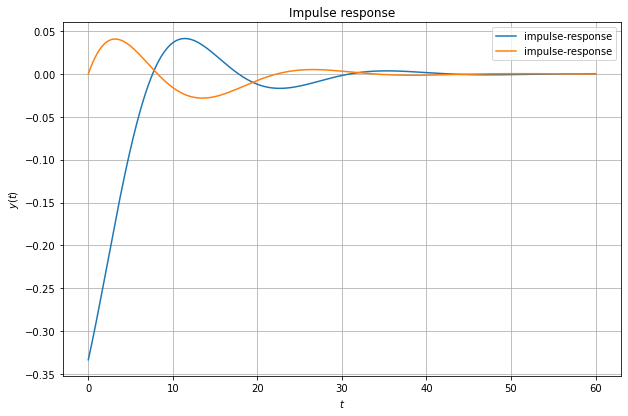

In [20]:
toutb, yb = sig.impulse(systf,T=t)
plt.figure(figsize=(10,6.5))
plt.plot(toutb,yb,label='impulse-response')
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.title('Impulse response')
plt.legend()
plt.grid(True)
plt.show()

#### Define the transferfunctions form the State-Space model

In [21]:
tfa=sig.TransferFunction(systf.num[0],systf.den)
print('The first transferfunction is: ',tfa)
zpka = tfa.to_zpk()
print('The ZerosPolesGain model of the first input is: ', zpka)
tfb=sig.TransferFunction(systf.num[1],systf.den)
print('The first transferfunction is: ',tfb)
zpkb = tfb.to_zpk()
print('The ZerosPolesGain model of the first input is: ', zpkb)

The first transferfunction is:  TransferFunctionContinuous(
array([1.        , 0.07142857, 0.02857143, 0.        ]),
array([1.        , 0.4047619 , 0.11904762, 0.01428571]),
dt: None
)
The ZerosPolesGain model of the first input is:  ZerosPolesGainContinuous(
array([-0.03571429+0.16521476j, -0.03571429-0.16521476j,
        0.        +0.j        ]),
array([-0.11139634+0.25709349j, -0.11139634-0.25709349j,
       -0.18196923+0.j        ]),
1.0,
dt: None
)
The first transferfunction is:  TransferFunctionContinuous(
array([ 2.85714286e-02, -5.20417043e-18]),
array([1.        , 0.4047619 , 0.11904762, 0.01428571]),
dt: None
)
The ZerosPolesGain model of the first input is:  ZerosPolesGainContinuous(
array([1.82145965e-16]),
array([-0.11139634+0.25709349j, -0.11139634-0.25709349j,
       -0.18196923+0.j        ]),
0.02857142857142861,
dt: None
)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


#### Bode-plot of the two transfer functions

First define the frequency axis

In [22]:
ws = np.linspace(10**-2, 10**1,400)       # Define the frequency range
wa, maga, phasea = tfa.bode(ws)
wb, magb, phaseb = tfb.bode(ws)

<Figure size 432x288 with 0 Axes>

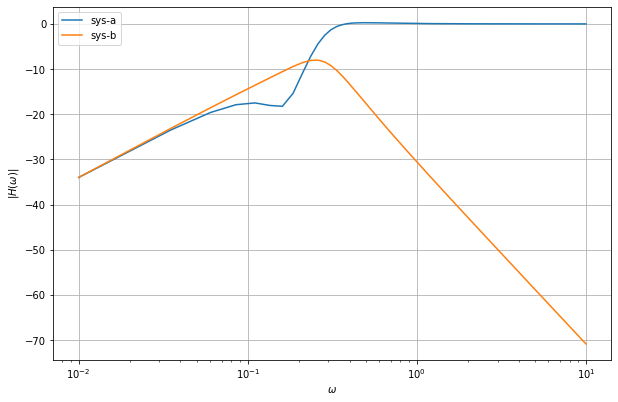

<Figure size 432x288 with 0 Axes>

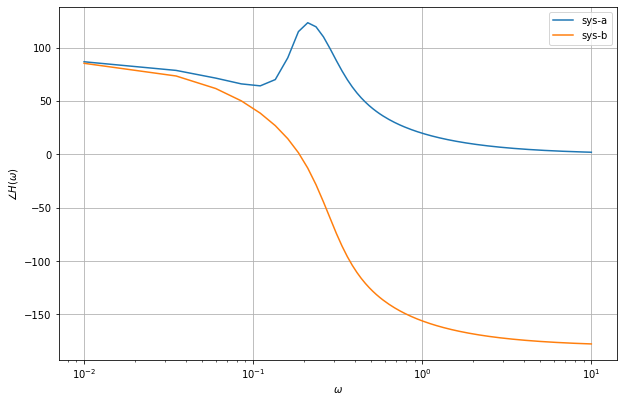

In [23]:
plt.figure()
plt.figure(figsize=(10,6.5))
plt.semilogx(wa, maga, label = 'sys-a')    # Bode magnitude plot system a
plt.semilogx(wb, magb, label = 'sys-b')    # Bode magnitude plot system b
plt.xlabel (r'$\omega$')
plt.ylabel (r'$|H(\omega)|$')
plt.legend()
plt.grid(True)
plt.figure()
plt.figure(figsize=(10,6.5))
plt.semilogx(wa, phasea, label = 'sys-a')  # Bode phase plot system a
plt.semilogx(wb, phaseb, label = 'sys-b')  # Bode phase plot system b
plt.xlabel (r'$\omega$')
plt.ylabel (r'$\angle H(\omega)$')
plt.legend()
plt.grid(True)
plt.show()